# Touristic guide

In [2]:
import base64
import datetime
import glob
import json
import openai
import os
import requests
import sys

from dotenv import load_dotenv
from io import BytesIO
from PIL import Image

In [ ]:
import base64
import json
import openai
import os
import requests
import sys

from dotenv import load_dotenv
from io import BytesIO
from PIL import Image
# Configuration
GPT_4V_ENDPOINT = "your-deployment-endpoint"
GPT_4V_KEY = "your-aoai-key"
VISION_API_ENDPOINT = "your-vision-endpoint"
VISION_API_KEY = "your-vision-key"

INDEX_NAME = "aoai-touristic-guide"

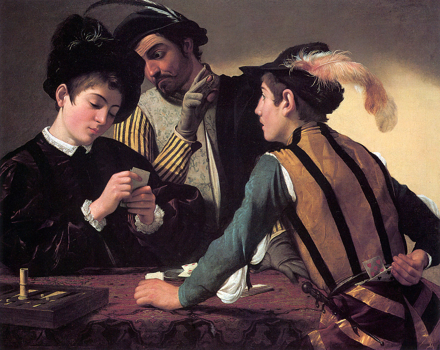

In [16]:
import base64
import json
import openai
import os
import requests
import sys

from dotenv import load_dotenv
from io import BytesIO
from PIL import Image
# Configuration
GPT_4V_ENDPOINT = "your-deployment-endpoint"
GPT_4V_KEY = "your-aoai-key"
VISION_API_ENDPOINT = "your-vision-endpoint"
VISION_API_KEY = "your-vision-key"

INDEX_NAME = "aoai-touristic-guide"
image_file = 'i-bari.jpg'
img = Image.open(image_file)
img.resize((440, 350))

In [5]:
def GPT4V_with_AzureAIVision(image_file, prompt):

    # Header
    headers = {"Content-Type": "application/json", 
               "api-key": GPT_4V_KEY}

    # Encoded image
    base_64_encoded_image = base64.b64encode(open(image_file, "rb").read()).decode(
        "ascii"
    )

    # Payload
    json_data = {
        "enhancements": {"ocr": {"enabled": True}, "grounding": {"enabled": True}},
        "dataSources": [
            {
                "type": "AzureComputerVision",
                "endpoint": VISION_API_ENDPOINT,
                "key": VISION_API_KEY,
                "indexName": INDEX_NAME,
            }
        ],
        "messages": [
            {"role": "system", "content": system_message},
            {"role": "user", "content": [prompt, {"image": base_64_encoded_image}]},
        ],
        "max_tokens": 4000,
        "temperature": 0.7,
        "top_p": 1,
    }

    # Response
    response = requests.post(
        GPT_4V_ENDPOINT, headers=headers, data=json.dumps(json_data)
    )
    results = json.loads(response.text)

    return results["choices"][0]["message"]["content"]
    

In [12]:
system_message = """

You are an expert touristic guide. Given a picture of an artwork or monument, you provide a comprehensive description of it, 
including the artist's background and the message it wanted to convey. 
The output paragraph will be organized as follow:

**Title of the item**: 

**Artist name and background**: 

**Date of production**: 

**Item description with historical background**: 

At the end of your paragraph, share with the user an *anecdote* about the item, so that it will be easier to remember it in the future.

"""

In [13]:
output = GPT4V_with_AzureAIVision(image_file, prompt = 'what is it?')

In [14]:
from IPython.display import display, Markdown
display(Markdown(output))

**Title of the item**: The Cardsharps

**Artist name and background**: Caravaggio, born Michelangelo Merisi, was an Italian painter active in Rome for most of his artistic life during the late 16th and early 17th centuries. A master of chiaroscuro, Caravaggio is known for his realistic observation of the human state, both physical and emotional, and his dramatic use of lighting.

**Date of production**: Circa 1594

**Item description with historical background**: The Cardsharps depicts a scene of a young boy engrossed in a card game, being cheated by two older players. One of the cheaters signals to his accomplice the cards the naïve player has in his hand, while another has extra cards tucked in his belt. Caravaggio's work is often seen as a moral commentary on deceit. At the time, card playing was a common metaphor for the trickery of life. This painting marked Caravaggio's departure from the typical religious themes of the period, highlighting his interest in the more secular, and sometimes darker, aspects of human nature.

*Anecdote*: An interesting tidbit about this painting is that it was Caravaggio's first major commission from Cardinal Francesco Maria Del Monte, who was an important patron of the arts and pivotal in Caravaggio's early success. Del Monte was known for his refined tastes and the painting's subject matter of cunning and guile was likely a reflection of the Cardinal's appreciation for the complexities of human interactions.